# Modelo estocástico del precio del crudo maya

El siguiente trabajo tiene como finalidad modelar estocásticamente el comportamiento del precio promedio mensual del barril de petróleo crudo maya mediante una serie de tiempo que comprende 10 años de información, de Enero de 2010 a Diciembre de 2019, con una periodicidad mensual.
Para acotar el caso se tomará la oferta y la demanda como factores clave que influyen directamente en el precio de este commodity.

## Descripción del fenómeno

### Precio del barril de crudo

Los precios del petróleo se presentan como dólares por barril y abarcan una serie de números reales, es decir, de menos infinito a infinito. Aunque comúnmente los precios son números positivos que incluyen decimales, en algunas extrañas ocasiones su precio ha estado en números negativos a causa de diversas situaciones que generan este gran impacto.

### Descripción del tiempo

La determinación del precio del petróleo se considera en un proceso largo, pero el momento en el que se convierte en un proceso estocástico ocurre cuando lo impactan los factores de la oferta y la demanda.
En este caso se analizará el precio en una serie de tiempo mensual, por lo que se considera cada mes como una unidad de tiempo y por tanto, el tiempo en que se desarrolla este fenómeno, como discreto y finito. 

### Oferta y Demanda

Existen varios factores que afectan directamente a la oferta (producción en miles de barriles) y demanda (exportación en miles de barriles) de crudo mexicano, por lo que los precios aumentarán en consonancia con la demanda, en el supuesto de que la oferta permanezca estática, y disminuirán a medida que la oferta aumente, en el supuesto de que la demanda permanezca estática.

### Variación

Para reflejar de mejor manera el comportamiento de la serie de tiempo del crudo maya es pertinente trabajar con las variaciones del precio, es decir, el cambio entre el precio de un mes $n$ al anterior inmediato $n-1$ está determinado por tasas relacionadas a la oferta y la demanda, según corresponda.
Por lo tanto, el precio más reciente es el que viene acumulando la información completa de los precios anteriores, por lo que siempre será éste quien determine el comportamiento del precio en el siguiente periodo.
Al trabajar con las variaciones, se hace el supuesto de que éstas se distribuyen Normalmente, por lo que se estaría partiendo de una distribución empírica.

Cualquier tasa de cambio está determinada por la ecuación:

$$r_{n} = \frac{X{n}}{X_{n-1}} - 1$$

Donde:
- $X_{n}$ es el valor de una variable en el tiempo n
- $X_{n-1}$ es el valor de una variable en el tiempo n-1
- $r_{n}$ es la tasa de cambio del periodo n


## Características del modelo

El modelo consta de una serie de precios $P$ positivos y negativos del petróleo crudo maya registrados durante los $N$ meses del periodo comprendido en 10 años, afectados por la oferta $O$ y la demanda $D$.

Por parte de la oferta y la demanda en base a datos históricos, el estado $O = D$ tiene una probabilidad casi nula de ocurrencia, por lo que para el siguiente análisis cada precio mensual del barril de crudo puede verse afectado sólo por alguno de los siguientes 2 estados de forma independiente en un momento dado:

 1. $O$ <= $D$ 
 2. $D$ < $O$
    
Me referiré a tales estados en adelante como $E_1$ y $E_2$.

Cada estado en este análisis estará representado por una tasa promedio de cambio del precio del crudo:

 1. $(\mu_{r_{E1}})$ = $\frac{\sum{r_{E1}}}{T_{E1}}$ 
 2. $(\mu_{r_{E2}})$ = $\frac{\sum{r_{E2}}}{T_{E2}}$ 


Dada la información anterior se tiene por lo tanto que $\{X_n: n \in\ T\}$ con $X_n = X_{n-1} * (1+r_{n})$

Donde:
- $X_{n}$ es la variable aleatoria a modelar que corresponde al precio del crudo maya en el tiempo n
- $X_{n-1}$ es el precio del crudo maya en el tiempo n-1
- $r_{n}$ es la tasa de cambio del periodo n donde $r \sim \text{Normal}(\mu,\sigma^2)$.

## Supuestos a probar

La hipótesis inicial trata de demostrar que los precios aumentarán en consonancia con la demanda, en el supuesto de que la oferta permanezca estática, y disminuirán a medida que la oferta aumente, en el supuesto de que la demanda permanezca estática.

También se hace el supuesto de que el proceso estocástico que modela la serie del crudo maya es el Movimiento Browniano.

Un proceso estocástico $B_{t}$ : $t \geq 0$ con un espacio de estados $S = R$ es un Movimiento Browniano sí:

1. $B_{0} = 0$
2. $t \mapsto B_{t} (w)$, es decir, tiene trayectorias continuas
3. Los incrementos son independientes
4. $\forall 0 \leq s < t, B_{t} - B_{s} \sim \text{N}(\mu,\sigma^2)$.

Además se debe cumplir la propiedad de Markov, la cual hace referencia a que el pasado y el futuro son independientes cuando se conoce el presente. Esto significa que si uno conoce el estado actual del proceso, entonces no se requiere información adicional de sus estados pasados para hacer la mejor predicción posible de su futuro.


## Simulaciones

In [71]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
from scipy import stats
from scipy.stats import skew
from scipy.stats import norm
from scipy.stats import lognorm
from statsmodels.stats.stattools import durbin_watson
import random

<function matplotlib.pyplot.show(*args, **kw)>

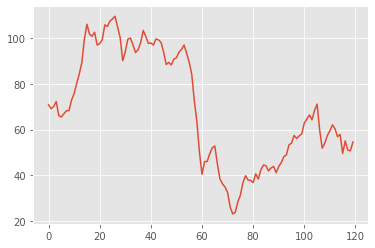

In [72]:
#Lectura de los precios originales del crudo maya, de Enero de 2010 a Diciembre de 2019

Precios = [70.866452,69.134714,70.093660,72.292077,66.101763,65.540751,66.923774,68.245485,68.332475,72.942531,75.758392,
           80.208666,84.324640,89.161930,99.432700,106.104005,101.835091,100.828631,102.599593,96.988597,97.634395,99.366005,
           105.806100,105.126973,107.455818,108.451418,109.604263,104.893764,100.233358,90.181843,94.012683,99.512167,
           100.076628,97.108629,93.682388,94.939944,97.982782,103.352938,100.770902,97.755385,97.906861,96.993153,99.672555,
           99.244140,98.145716,93.873293,88.485898,89.409659,88.310808,90.822240,91.395224,93.888630,95.086309,97.011046,
           93.320166,89.507449,84.128243,72.509358,63.479800,50.181375,40.451272,45.986060,46.017331,49.325551,52.039105,
           52.825725,45.165949,38.419266,36.290362,34.860768,32.508829,26.196096,23.102382,23.729330,28.326563,31.335818,
           36.726361,39.807146,37.971526,37.740903,36.826661,40.668356,38.361623,42.325962,44.500081,44.174971,41.932428,
           43.221180,43.850742,41.151050,43.877714,45.554842,48.162370,48.891135,53.345048,54.055756,57.453995,56.156762,
           57.224584,58.159732,62.899289,64.636865,66.421619,64.265666,68.363482,71.153304,59.825830,51.868669,54.056660,
           57.379810,59.464492,62.077030,60.336736,56.905373,57.875797,49.584961,55.055218,51.004627,50.689694,54.549013]

Precios = pd.DataFrame(Precios)
Precios.columns = ['Precios']

plt.plot(Precios)
plt.show

In [73]:
#Obtención de las variaciones de los precios originales

T = len(Precios)
i = 0
Variaciones = []

for i in range(T-1):
    r = (Precios.iloc[i+1,0]/Precios.iloc[i,0]) - 1
    Variaciones.append(r)
    i = i +1

Variaciones = pd.DataFrame(Variaciones)
Variaciones.columns = ['Variaciones']
Variaciones.index = Precios.index[1:T]

print(Variaciones)

     Variaciones
1      -0.024437
2       0.013871
3       0.031364
4      -0.085629
5      -0.008487
..           ...
115    -0.143252
116     0.110321
117    -0.073573
118    -0.006175
119     0.076136

[119 rows x 1 columns]


<function matplotlib.pyplot.show(*args, **kw)>

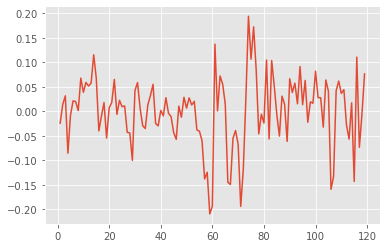

In [42]:
#Variaciones

plt.plot(Variaciones)
plt.show

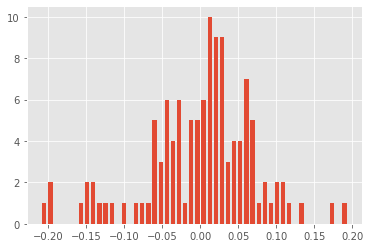

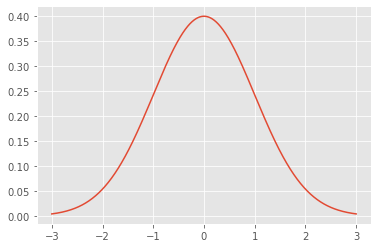

In [75]:
#Histograma de las variaciones

hist, bins = np.histogram(Variaciones, bins=50) 
width = 0.7 * (bins[1] - bins[0]) 
center = (bins[:-1] + bins[1:])/2 
plt.bar(center, hist, align='center', width=width) 
plt.show() 

#Gráfico de una distribución normal
x1 = np.linspace(-3, 3, 1000) 
y1 = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x1)**2  ) 
plt.plot(x1,y1)

Se verifica el supuesto de que la distribución de las variaciones se comporte como una Normal por medio de las gráficas y del 
test de Skewness.

- $H_0 = \text{Es una Normal}$
- $H_a \neq \text{Es una Normal}$

In [77]:
stats.mstats.skewtest(Variaciones)

SkewtestResult(statistic=masked_array(data=[-2.389133890201588],
             mask=[False],
       fill_value=1e+20), pvalue=array([0.01688815]))

In [78]:
skew(Precios)

array([0.05322268])

A un 90% de confianza, dado que el P-value es $> 0.01$ no se rechaza H0 y se asume que los rendimientos están distribuidos normalmente. De igual manera, si la asimetría está entre $-0.5$ y $0.5$, la distribución es aproximadamente simétrica. Por lo tanto queda probado uno de los supuestos.

Como se mencionó anteriormente a cada estado se le asignó una tasa promedio, ésta corresponde a la media de las variaciones
del precio que coinciden con las caracerísticas de cada estado, es decir, las variaciones cuando O <= D y O > D.

Además se obtuvo su respectiva desviación estándar.

$(\mu_{r_{E1}})$ = $\frac{\sum{r_{E1}}}{T_{E1}}$ = 0.008

$(\sigma_{r_{E1}})$ = 0.068

$(\mu_{r_{E2}})$ = $\frac{\sum{r_{E2}}}{T_{E2}}$ = -0.001

$(\sigma_{r_{E2}})$ = 0.073  

Con la información anterior se puede obtener una distribución empírica de las variaciones del precio aplicadas a cada 
estado para así modelar su comportamiento futuro. Es decir, la normalidad de las variaciones originales se le va a heredar a las variaciones simuladas de los estados $E_1$ y $E_2$.

(array([  1.,   8.,  39.,  88., 190., 265., 223., 117.,  59.,  10.]),
 array([-0.23431913, -0.19129308, -0.14826703, -0.10524097, -0.06221492,
        -0.01918887,  0.02383719,  0.06686324,  0.10988929,  0.15291534,
         0.1959414 ]),
 <a list of 10 Patch objects>)

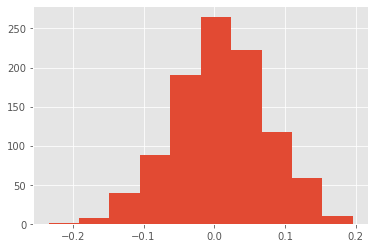

In [80]:
#Se hacen las variaciones de los precios con respecto al E1
np.random.seed(1234)

mu_E1 = 0.008
mu_E2 = -0.001
sigma_E1 = 0.068
sigma_E2 = 0.073

data1 = np.random.normal(loc=mu_E1, scale=sigma_E1, size=1000)
DatosE1 = pd.DataFrame(data1)
DatosE1.columns = ['Variaciones D >= 0']

plt.hist(data1)

(array([  1.,   8.,  39.,  88., 190., 265., 223., 117.,  59.,  10.]),
 array([-0.26113672, -0.21494698, -0.16875725, -0.12256752, -0.07637778,
        -0.03018805,  0.01600168,  0.06219142,  0.10838115,  0.15457088,
         0.20076062]),
 <a list of 10 Patch objects>)

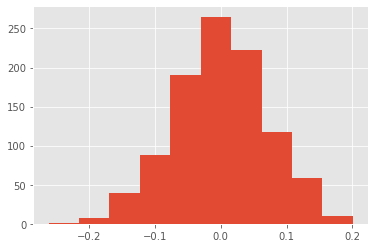

In [81]:
#Se hacen las variaciones de los precios con respecto al E2

np.random.seed(1234)

data2 = np.random.normal(loc=mu_E2, scale=sigma_E2, size=1000)
DatosE2 = pd.DataFrame(data2)
DatosE2.columns = ['Variaciones D<0']

plt.hist(data2)

Ahora se realiza la prueba de independencia o autocorrelación de Durbin-Watson. Para que se cumpla la independencia el valor de la prueba tiene que estar en un rango de 1.2 a 2.8 y el valor obtenido de nuestros datos es 2.07 para E1 y 2.11 para E2, por lo tanto, se cumple la independencia, y queda demostrado otro de los supuestos.

In [47]:
durbin_watson(DatosE1, axis=0)

array([2.07329926])

In [68]:
durbin_watson(DatosE2, axis=0)

array([2.11224901])

Se realizan 1000 simulaciones de los precios para cada uno de los estados, teniendo como precio inicial el promedio de los precios de la serie original por lo que se cumple la propiedad de Markov, ya que teniendo un solo valor actual del proceso, no se requiere información adicional de los precios pasados para hacer la estimación de los precios futuros. Además se comienza con una variación inicial de 0, por lo que el supuesto de que $B_{0} = 0$ también queda demostrado.

      Precios D>=O
0        71.815977
1        74.692752
2        69.241201
3        76.540890
4        75.525933
...            ...
996   61650.164073
997   66048.601883
998   68048.038271
999   72020.365535
1000  68669.290822

[1001 rows x 1 columns]


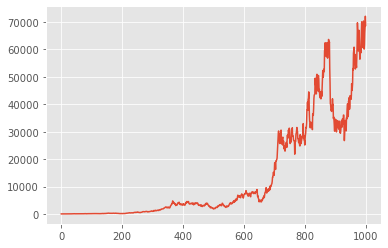

In [85]:
#Simulaciones de los precios de los 2 estados

Inicio = 69.05 #Promedio de los precios originales
r_E1 = DatosE1
r_E2 = DatosE2

#Obtención de precios cuando D >= O; el supuesto es que los precios aumentan.

N = 1000
i = 1
PreciosE1 = []

#Se calcula el primer precio tomando como base el promedio de los precios de la base original
PE1 = (Inicio * (1+r_E1.iloc[0,0]))
PreciosE1.append(PE1)

#Se calculan los siguientes precios de la serie
for i in range(N):
    PE1 = (PE1 * (1+r_E1.iloc[i,0]))
    PreciosE1.append(PE1)
    i = i+1

PreciosE1 = pd.DataFrame(PreciosE1)
PreciosE1.columns = ['Precios D>=O']

print(PreciosE1)

plt.plot(PreciosE1)

      Precios D<O
0       71.357290
1       73.741677
2       67.256743
3       74.223709
4       72.455434
...           ...
996      6.014273
997      6.417247
998      6.564265
999      6.912692
1000     6.501117

[1001 rows x 1 columns]


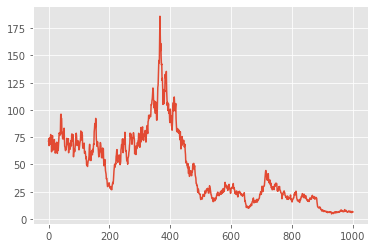

In [86]:
#Obtención de precios cuando D < O; el supuesto es que los precios disminuyen.

N = 1000
i = 1
PreciosE2 = []

#Se calcula el primer precio tomando como base el promedio de los precios de la base original
PE2 = (Inicio * (1+r_E2.iloc[0,0]))
PreciosE2.append(PE2)

#Se calculan los siguientes precios de la serie
for i in range(N):
    PE2 = (PE2 * (1+r_E2.iloc[i,0]))
    PreciosE2.append(PE2)
    i = i+1

PreciosE2 = pd.DataFrame(PreciosE2)
PreciosE2.columns = ['Precios D<O']

print(PreciosE2)

plt.plot(PreciosE2)

Dados los resultados de las gráficas, se puede apreciar que efectivamente la hipótesis inicial que trata de demostrar que 
los precios aumentarán en consonancia con la demanda, en el supuesto de que la oferta permanezca estática, y disminuirán a
medida que la oferta aumente, en el supuesto de que la demanda permanezca estática, es verdadera.

In [70]:
def lognorm_check(PreciosE1):
    sigma = np.std(np.log(PreciosE1))
    mu = np.mean(np.log(PreciosE1))
    count, bins, ignored = plt.hist(
        PreciosE1, 100, normed=True, align='mid', label='Histograma de precios')
    x = np.linspace(min(bins), max(bins), 10000)
    pdf = (np.exp(-((np.log(x) - mu)*2) / (2 * sigma*2))) / (x * sigma * np.sqrt(2 * np.pi))
    plt.plot(x, pdf, linewidth=2, color='r', label='Distribución Lognorm')
    plt.axis('tight')
    plt.legend()
    plt.title('Lognorm Prices')
    plt.xlabel("PreciosE1")
    plt.ylabel("Frecuencia")
    plt.show()
    
print(lognorm_check)    

<function lognorm_check at 0x0000019316CEE550>


In [87]:
def lognorm_check(PreciosE2):
    sigma = np.std(np.log(PreciosE2))
    mu = np.mean(np.log(PreciosE2))
    count, bins, ignored = plt.hist(
        PreciosE2, 100, normed=True, align='mid', label='Histograma de precios')
    x = np.linspace(min(bins), max(bins), 10000)
    pdf = (np.exp(-((np.log(x) - mu)*2) / (2 * sigma*2))) / (x * sigma * np.sqrt(2 * np.pi))
    plt.plot(x, pdf, linewidth=2, color='r', label='Distribución Lognorm')
    plt.axis('tight')
    plt.legend()
    plt.title('Lognorm Prices')
    plt.xlabel("PreciosE2")
    plt.ylabel("Frecuencia")
    plt.show()
    
print(lognorm_check)

<function lognorm_check at 0x0000019345D3A790>


Finalmente se realiza la prueba que demuestra la continuidad de los precios para ambos estados, con lo que finalmente queda demostrado que la serie de precios del petróleo crudo maya puede ser modelada por el Movimiento Browniano.